# Data Load

file_list: ['이민호.jpeg', '레드벨벳웬디.jpg', '개코.jpeg', '장동건.jpeg', '이천수.jpg', '브래들리 쿠퍼.jpg', '아놀드 슈워제네거.jpg', '민니.jpg', '심수창.jpeg', '로저 무어.jpeg', '김현수.jpeg', '류승범.jpg', '박건우.png', '이영하.jpg', '김영삼.jpeg', '박정민.jpg', '딕헌터.jpeg', '주호민.jpeg', '아이린.jpeg', '김종서.jpg', '잭 스페이더.jpeg', '강미나.jpg', '수지.jpg', '태양.jpeg', '트와이스미나.jpg', '영알남.png', '잭 갤리퍼내키스.jpg', '아이즈원조유리.jpeg', '유노윤호.jpg', 'clinton.jpeg', '슬기.jpg', 'b1a4진영.jpeg', '이대형.jpg', '나인뮤지스경리.jpg', '트와이스사나.jpg', '즐라탄_2.jpeg', '박희순.jpg', '유재석.jpg', '야마다 타카유키.jpeg', '성룡.jpg', '이진호.jpeg', '지디.jpg', '효정.jpg', '류진.jpg', '정민철.jpg', '박재범.jpg', '이경규.jpeg', '채연.jpg', '신비.jpg', '박항서.jpg', '하정우.jpg', '도지한.jpg', '김경진.png', '도아.jpeg', '무라니시.png', '한기범.jpg', '서강준.jpg', '화사.jpg', '이제훈.jpeg', 'ᄉ

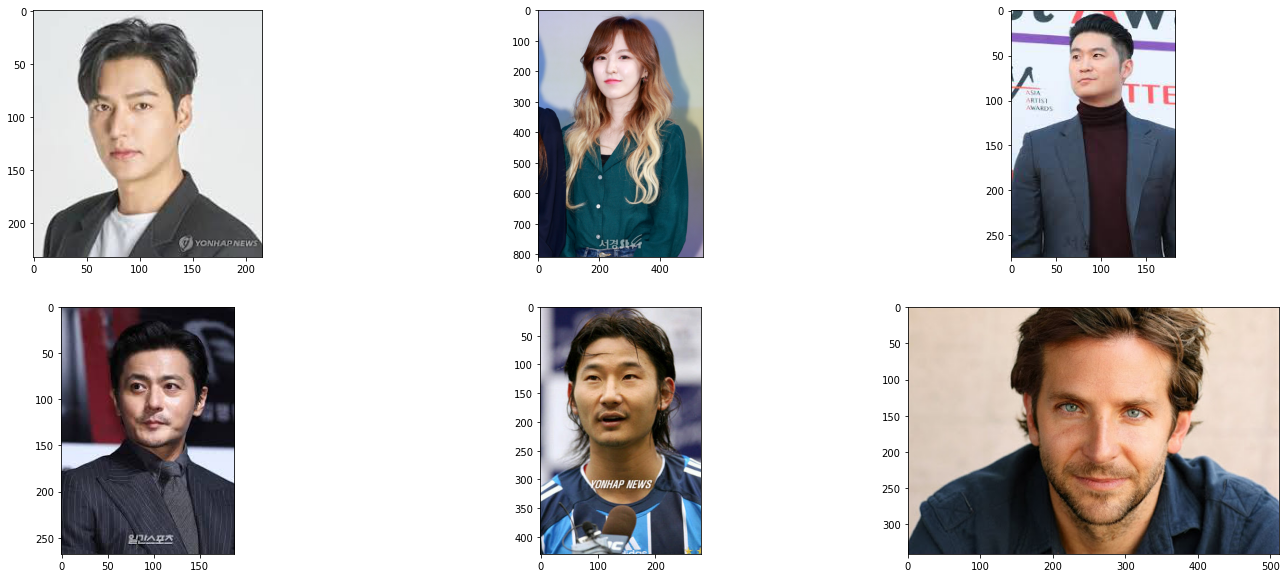

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np

dir_path = os.getenv('HOME')+'/Aiffel/face_embedding/celebrity'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))


#Set figsize here
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
    image = img.imread(dir_path+'/'+file_list[i])
    ax.imshow(image)
plt.show()

fig.tight_layout()

# Crop

[(98, 390, 253, 236)]


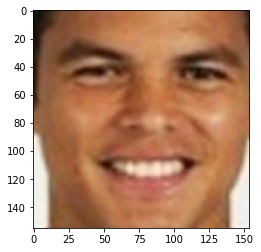

In [2]:
import face_recognition
%matplotlib inline

image_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/티아고실바.jpeg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:] # 좌표값으로 얼굴 영역만 crop

plt.imshow(cropped_face) 

In [3]:
# crop을 위한 함수
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    
    if len(face_locations) == 1:
        a,b,c,d = face_locations[0]
        cropped_face = image[a:c, d:b, :]
        return cropped_face


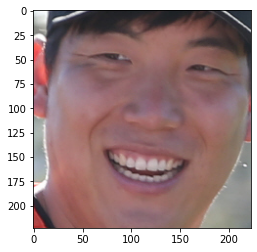

In [4]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/김현수.jpeg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

# Embedding

In [5]:
image_file = os.path.join(dir_path, '이민호.jpeg')
face = get_cropped_face(image_file)   # 얼굴 영역을 구하는 함수

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-0.12547097,  0.11558688,  0.10312223,  0.03635105, -0.11481263,
        -0.0200277 , -0.03213571, -0.08434972,  0.11317375, -0.04730042,
         0.167384  , -0.0747384 , -0.22569937, -0.06730208, -0.04824855,
         0.17882979, -0.09468077, -0.17560586, -0.01602815,  0.01049383,
         0.10578894,  0.00697166, -0.0189931 ,  0.0309616 , -0.14982609,
        -0.31225258, -0.06806303, -0.04891994, -0.03679011, -0.02653556,
        -0.05800585,  0.01309972, -0.17814663, -0.0523513 ,  0.01318195,
         0.09574805,  0.01658323, -0.06723436,  0.15573047, -0.06345136,
        -0.28129762,  0.05826123,  0.10228532,  0.23270439,  0.14782077,
         0.02997591,  0.01483392, -0.13111268,  0.0716439 , -0.14421016,
         0.05987203,  0.14280415,  0.01578511,  0.03487431,  0.04828437,
        -0.14900152,  0.04444   ,  0.0833441 , -0.18129373,  0.02405217,
         0.07893607, -0.03516749,  0.01286651, -0.06734807,  0.14362301,
         0.10567226, -0.01336974, -0.24841855,  0.1

In [6]:
# dir_path 내의 이미지들에 대해서 embedding 벡터를 딕셔너리 형태로 저장
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        if face is not None:
            embedding = get_face_embedding(face)
        if len(embedding) > 0:
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict

In [7]:
embedding_dict = get_face_embedding_dict(dir_path)

In [40]:
embedding_dict['이민호']

array([-0.12547097,  0.11558688,  0.10312223,  0.03635105, -0.11481263,
       -0.0200277 , -0.03213571, -0.08434972,  0.11317375, -0.04730042,
        0.167384  , -0.0747384 , -0.22569937, -0.06730208, -0.04824855,
        0.17882979, -0.09468077, -0.17560586, -0.01602815,  0.01049383,
        0.10578894,  0.00697166, -0.0189931 ,  0.0309616 , -0.14982609,
       -0.31225258, -0.06806303, -0.04891994, -0.03679011, -0.02653556,
       -0.05800585,  0.01309972, -0.17814663, -0.0523513 ,  0.01318195,
        0.09574805,  0.01658323, -0.06723436,  0.15573047, -0.06345136,
       -0.28129762,  0.05826123,  0.10228532,  0.23270439,  0.14782077,
        0.02997591,  0.01483392, -0.13111268,  0.0716439 , -0.14421016,
        0.05987203,  0.14280415,  0.01578511,  0.03487431,  0.04828437,
       -0.14900152,  0.04444   ,  0.0833441 , -0.18129373,  0.02405217,
        0.07893607, -0.03516749,  0.01286651, -0.06734807,  0.14362301,
        0.10567226, -0.01336974, -0.24841855,  0.15598577, -0.21

# 거리 측정

In [46]:
# L2norm 사용
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('신현준', '즐라탄_2')

0.8612175204079757

In [43]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

In [44]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))


In [47]:
get_nearest_face('배성재')

순위 1 : 이름(최양락), 거리(0.354005242725195)
순위 2 : 이름(박휘순), 거리(0.3788588761560937)
순위 3 : 이름(안재홍), 거리(0.38527464141442186)
순위 4 : 이름(이대호), 거리(0.3928363540030528)
순위 5 : 이름(박건우), 거리(0.4038186048074688)


# Point

- crop 하는 부분에서 **'list index out of range'**가 떠서 애를 먹었다. 
- face locations를 쭉 출력해보니 배경에 사람 사진이 있는 등의 이유로 두 개의 얼굴 좌표가 나오는 경우들이 있었다.
- 문제가 있는 부분이지만 face_locations[0]를 하게 되면 결국 하나의 얼굴 좌표만 나와 에러가 왜 나오나 했는데 **아예 detection이 안 되는 경우**들이 있었다.
- **'if len(face_locations) == 1:'**를 통해 하나의 얼굴이 detection 되는 경우 crop 이미지를 리턴하여 해결했다.     



- 이번에는 다음 임베딩 과정에서 **'Unsupported image type, must be 8bit gray or RGB image.'** 에러 발생
- **get_cropped_face 함수의 결과 중 None** 값들이 있어 뜨는 에러였다.
- **'if face is not None:'**을 통해 해결